adapted from: https://github.com/bikz05/ipython-notebooks/blob/master/machine-learning/naive-bayes-mnist-sklearn.ipynb

# Naive Bayes on MNIST dataset
The first step is to download the handwritten image dataset. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Let's display some data :)

Now let's explore the data.

(Number of samples, No. of pixels) = (70000, 784)


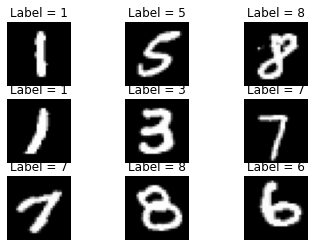

In [ ]:
# Display the number of samples 
print(f"(Number of samples, No. of pixels) = {mnist.data.shape}")

# Display 9 number randomly selectly
for c in range(1, 10):
    plt.subplot(3, 3,c)
    i = np.random.randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    plt.axis("off")
    plt.title("Label = {}".format(mnist.target[i]))
    plt.imshow(im, cmap='gray')

# Split the data into training and testing data

In [ ]:
# each pixel is a binary variable
mnist.data = (mnist.data > 128).astype(np.int)

# Split the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

# Which is same as 
# x_train = mnist.data[:split]
# y_train = mnist.target[:split]
# x_test = mnist.data[split:]
# y_test = mnist.target[split:]

# Prepare the classifier

In [ ]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

# Perform the predictions and display the results

In [ ]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_test, y_predicted)*100} %")
# Cross validate the scores
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_predicted, labels=range(0,10)))

Accuracy = 84.08571428571429 %
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       346
           1       0.82      0.95      0.88       378
           2       0.87      0.82      0.84       332
           3       0.81      0.81      0.81       400
           4       0.81      0.80      0.80       295
           5       0.82      0.79      0.80       335
           6       0.90      0.90      0.90       351
           7       0.93      0.85      0.89       362
           8       0.77      0.77      0.77       348
           9       0.77      0.80      0.79       353

   micro avg       0.84      0.84      0.84      3500
   macro avg       0.84      0.84      0.84      3500
weighted avg       0.84      0.84      0.84      3500



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
